In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libs.utils import EXPERIMENT

wave_lenght = 780e-9
L = 1e-3
groups=[1,4]
material = 'cg'

In [2]:
for i,g in enumerate(groups):
    print(f'\n*** MATERIAL: {material} GROUP: {g} ***')
    EX = EXPERIMENT(material,g,20)
    EX.set_experiment_values(wave_lenght,L)
    EX.close.calc_n2()
    print()
    EX = EXPERIMENT(material,g,40)
    EX.set_experiment_values(wave_lenght,L)
    EX.close.calc_n2()


*** MATERIAL: cg GROUP: 1 ***
Material: cg Aperture: close Power: 20
Peak: 1.0395327592517
Valley: 0.9555947722554219
Position of the focal plane: 0.12330402010050251 m, 0.0008165829145728998 m
Rayleigh range: 0.012488915164055583 m
Material: cg Aperture: open Power: 20
S: 0.34768699475089493
W0: 5.568455107348042e-05 m^2
I0: 4106205.431649215 W/m^2
DPhi: 0.23202211757761534
n2: 7.014608663977636e-12 m^2/W

Material: cg Aperture: close Power: 40
Peak: 1.0866991483072739
Valley: 0.9080754596583668
Position of the focal plane: 0.12412060301507538 m, 2.7755575615628914e-17 m
Rayleigh range: 0.013449600945906005 m
Material: cg Aperture: open Power: 40
S: 0.41233251894873
W0: 5.7786589604516555e-05 m^2
I0: 7625810.087348546 W/m^2
DPhi: 0.5078640502243864
n2: 8.267538400131956e-12 m^2/W

*** MATERIAL: cg GROUP: 4 ***
Material: cg Aperture: close Power: 20
Peak: 1.0478597110559003
Valley: 0.9518071831751282
Position of the focal plane: 0.12330402010050251 m, 0.0008165829145728998 m
Rayleigh 

In [3]:
L = 1e-2
groups=[2]
material = 'window'
for i,g in enumerate(groups):
    print(f'\n*** MATERIAL: {material} GROUP: {g} ***')
    EX = EXPERIMENT(material,g,20)
    EX.set_experiment_values(wave_lenght,L)
    EX.close.calc_n2()
    print()
    EX = EXPERIMENT(material,g,40)
    EX.set_experiment_values(wave_lenght,L)
    EX.close.calc_n2()


*** MATERIAL: window GROUP: 2 ***
Material: window Aperture: close Power: 20
Peak: 1.0125017707759993
Valley: 0.9866611082049596
Position of the focal plane: 0.11105527638190957 m, -1.3877787807814457e-17 m
Rayleigh range: 0.015370972509606872 m
Material: window Aperture: open Power: 20
S: 0.3335258400610313
W0: 6.177646281434677e-05 m^2
I0: 3336291.913214986 W/m^2
DPhi: 0.07101598516950845
n2: 2.642450178333946e-13 m^2/W

Material: window Aperture: close Power: 40
Peak: 1.0128726753519743
Valley: 0.960252457092433
Position of the focal plane: 0.11023869346733667 m, 0.004082914572864332 m
Rayleigh range: 0.018253029855158146 m
Material: window Aperture: open Power: 40
S: 0.3897484004260725
W0: 6.731933962428392e-05 m^2
I0: 5619017.959098931 W/m^2
DPhi: 0.1480945926209127
n2: 3.2718509841479877e-13 m^2/W


Material: cg Aperture: close Power: 20
Peak: 1.0395327592517
Valley: 0.9555947722554219
Position of the focal plane: 0.12330402010050251 m, 0.0008165829145728998 m
Rayleigh range: 0.012488915164055583 m
Material: cg Aperture: open Power: 20
S: 0.34768699475089493


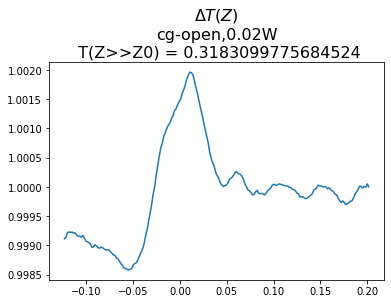

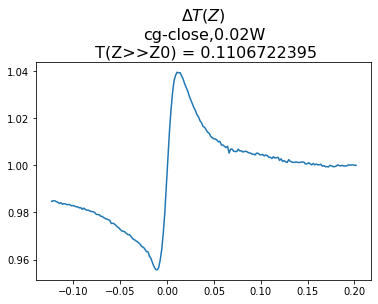

Material: cg Aperture: close Power: 20
Peak: 1.0478597110559003
Valley: 0.9518071831751282
Position of the focal plane: 0.12330402010050251 m, 0.0008165829145728998 m
Rayleigh range: 0.014410286727756426 m
Material: cg Aperture: open Power: 20
S: 0.33819827110855366


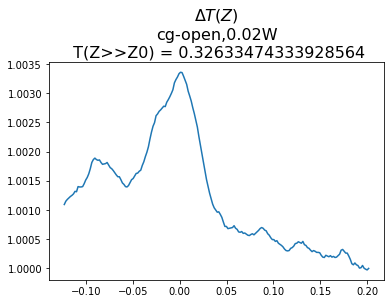

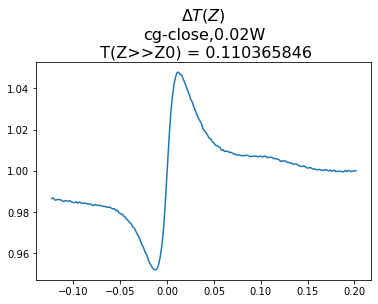

In [4]:
groups=[1,4]
material = 'cg'
p = 20
for i in range(2):
    EX = EXPERIMENT(material,groups[i],p)
    EX.open.plot_normalized_trasmittance()
    EX.close.plot_normalized_trasmittance()
    plt.show()

Material: window Aperture: close Power: 40
Peak: 1.0128726753519743
Valley: 0.960252457092433
Position of the focal plane: 0.11023869346733667 m, 0.004082914572864332 m
Rayleigh range: 0.018253029855158146 m
Material: window Aperture: open Power: 40
S: 0.3897484004260725


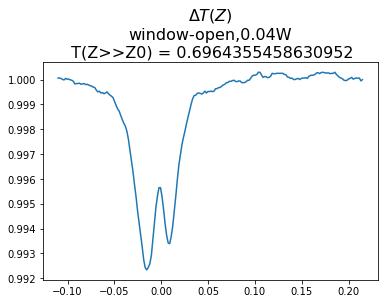

In [6]:
EX = EXPERIMENT('window',2,40)
EX.open.plot_normalized_trasmittance()

In [8]:
from scipy.optimize import curve_fit

def DT(z,qo):
    zo = EX.close.z0
    return qo/(2*np.sqrt(2))*1/(1+z**2/zo**2)+1

[-0.02108398]


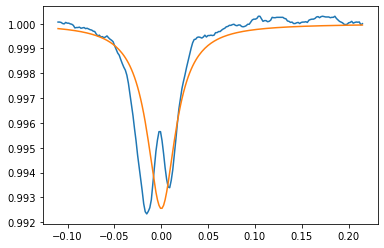

In [9]:
opt,_ = curve_fit(DT,EX.open.positions,EX.open.DT)
plt.plot(EX.open.positions,EX.open.DT)
plt.plot(EX.open.positions,DT(EX.open.positions,*opt))
print(opt)

In [8]:
import os
from itertools import product

In [10]:
directory = lambda m,g,t,p : f'Data/zscan_{m}_g{g}_{t}_{p}mW'
filenames = lambda m,g,t,p,v : directory(m,g,t,p)+f'/zscan_{m}_{v}_g{g}_{t}_{p}mW_log.csv'
newfilenames = lambda m,g,t,p,v : directory(m,g,t,p)+f'/zscan_{m}_g{g}_{t}_{p}mW_log.csv'
materials = ['cg','window']
groups = np.arange(1,8)
types = ['open','close']
powers = [20,40]
values = ['300322','040422']
for v in list(product(materials,groups,types,powers,values)):
    f = filenames(*v)
    if os.path.exists(f):
        os.rename(f,newfilenames(*v))